In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Linear Regression

In [2]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights

In [6]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# to make it a column vector
y = y.view(y.shape[0], 1)

n_samples , n_features = X.shape

In [7]:
# 1) model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [8]:
# 2) loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # zero the gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4317.3013
epoch: 20, loss = 3223.2698
epoch: 30, loss = 2431.4382
epoch: 40, loss = 1857.7321
epoch: 50, loss = 1441.6630
epoch: 60, loss = 1139.6467
epoch: 70, loss = 920.2385
epoch: 80, loss = 760.7223
epoch: 90, loss = 644.6683
epoch: 100, loss = 560.1805


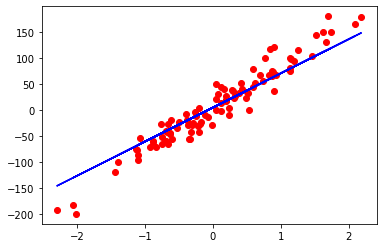

In [10]:
# plot
predicted = model(X).detach().numpy() # detach to make requires_grad=False
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()